# Example: Stochastic Optimal Growth
The optimal growth model is an economic application of the cake-eating problem. This notebook provides an example of how we solve dynamic programs in economics.

## Resource Feasibility
Suppose a consumer is trying to decide how much of her income $y_t$ to save (invest) and how much to consume $c_t$. We will denote investment
as $i_t = k_{t+1} - k_t$. Feasibility requires that,
$$c_t + i_t \leq y_t - \delta k_t.$$
Assuming there is full depreciation, $\delta_t = 1$, this can be written
$$c_t + k_{t+1} \leq y_t.$$

## Stochastic Income Process
$y_{t+1} = \xi_{t+1}f(k_{t+1})$ where $f(\cdot)$ is a continuous and increasing production function and the sequence of shock, $\{\xi_{t+1}\}$, is assumed to be iid. In
applications, these shocks are often correlated over time.

## Preferences
Described by a bounded, continuous and strictly increasing function $u(c_t)$.

## Optimal Growth Problem
$$\begin{align*}
\sup_{\{ c_t \}}\quad\mathbb{E}_0\sum_{t=0}^\infty\beta^tu(c_t)\quad\text{s.t.}\\
c_t + k_{t+1} \leq y_t\\
y_{t+1} = \xi_{t+1}f(k_{t+1})
\end{align*}$$

## Bellman Equation
Our assumptions so far tell us that $v^*(y)$ solves the Bellman equation (theorem 4.2 in SLP)
$$v(y) = \max_{0\leq c\leq y}\left\{u(c) + \beta\mathbb{E}_{\xi}v(\xi'f(y-c))\right\}.$$

## Parameterization
1. $f(k) = k^\alpha$
2. $u(c) = \ln(c)$
3. $\xi$ is log normal; $\xi = \exp(\mu + \sigma\zeta),\quad\zeta\sim N(0,1)$

## Exact Solution
The value function and policy functions can be solved for exactly in this example (this is done early on in SLP),
$$ v^*(y) = \frac{\ln(1-\alpha\beta)}{1-\beta} + \frac{\mu + \alpha\ln\alpha\beta}{1-\alpha}\left[\frac{1}{1-\beta} - \frac{1}{1-\alpha\beta}\right] + \frac{1}{1-\alpha\beta}\ln y$$
and policy is
$$\sigma^*(y) = (1-\alpha\beta)y$$

## Numerical Solution - Fitted Value Function Iteration (FVFI)
The basic algorithm for solving the Bellman equation by fitted VFI is,
1. Take a guess of the initial value function
2. Interpolate the guess and calculate the optimal policy under the interpolated guess
3. Update the guess by using the Bellman operator (the RHS of the Bellman equation)
4. Check for convergence, if not go to step 1

**Note I.** In the code the Bellman operator is $Tv := \max_{0\leq c\leq y}\left\{u(c) + \beta\mathbb{E}_{\xi}v(\xi'f(y-c))\right\}.$ Solving in this case means solving for a fixed point of this operator.

**Note II.** We will use calculate the expectation above using Monte Carlo methods, i.e. expectations are approximated with finite sample averages. The "sample" in this case will be drawn from a random number generator.


In [ ]:
using LinearAlgebra, Statistics, LaTeXStrings, Plots, Interpolations, NLsolve, Optim, Random
using Optim: maximum, maximizer
include("OptGrowthFVFI.jl")
Random.seed!(42)

# Specify preferences and technology
u(c;p) = log(c)
f(k;p) = k^p.α

# Use default values for the rest of the environment
p = ConstructParams()

# Solve for the value function using FVFI
v₀ = 5 * log.(p.y)
sol = FVFI(v₀; p)

# Diagnostic Plot
Now we will check how the FVFI algorithm did by comparing to the exact solution.

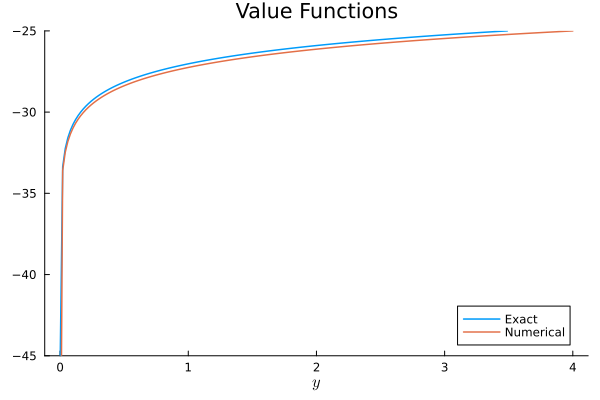

In [ ]:
# Compare exact value function
plot(p.y, v_star.(p.y; p), width = 1.5, label = "Exact")
plot!(p.y, sol.v_star, grid = false, ylim = (-45, -25), width = 1.5, label = "Numerical", title = "Value Functions", xlabel = L"$y$")

In [ ]:
# Compare exact policy function
plot(p.y, σ_star.(p.y; p), width = 1.5, label = "Exact")
plot!(p.y, sol.σ_star, grid = false, ylim = (-45, -25), width = 1.5, label = "Numerical", title = "Policy Functions", xlabel = L"$y$")